<h1>Classify a person as having a (cardiovascular) heart disease or not</h1>

Dataset: <a href='https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/data'>Data</a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cardio.csv to cardio.csv


In [0]:
df = pd.read_csv('cardio.csv',sep=';')

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
df.shape

(70000, 13)

In [10]:
#Count the empty values in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
df.isnull().values.any()

False

In [15]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Count the number of patients with heart disease
#0 is negative, 1 is positive
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

No handles with labels found to put in legend.


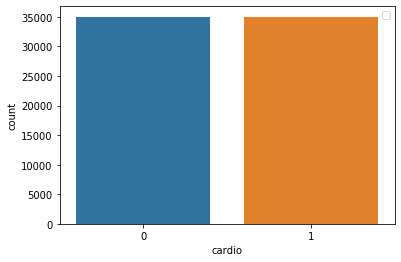

In [21]:
#Visualize the count
sns.countplot(df['cardio'])
plt.show()

In [0]:
#Number of people with a heart disease that exceed number of people without heart disease

#Create a years column
df['years'] = np.round((df['age']/365),0).astype(int)

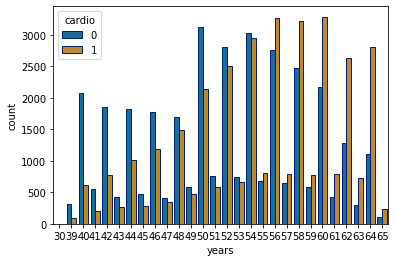

In [28]:
#Visualize the data
sns.countplot(x='years',hue='cardio',palette='colorblind',data=df,edgecolor=sns.color_palette('dark',n_colors=1))
plt.show()

In [29]:
#Get the correlation of the columns
#How columns are correlated with each other, 1=strongly correlated,0=no correlation,-1=inverse correlation
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


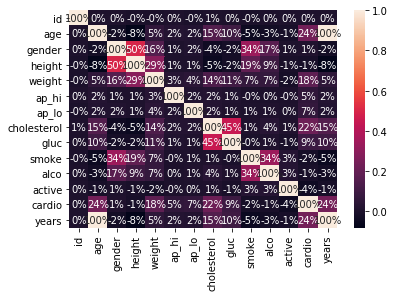

<Figure size 504x504 with 0 Axes>

In [32]:
#Visualize the data
sns.heatmap(df.corr(),annot=True,fmt='.0%')
plt.figure(figsize=(7,7))
plt.show()

In [0]:
#Prepare data for ML model (remove the years column)
df.drop(['years'],axis=1,inplace=True)

In [0]:
df.drop(['id'],axis=1,inplace=True)

In [0]:
#Split data into feature(x) and target data(y)

#All columns except last
X = df.iloc[:,:-1]

#last column (response/predicted/target column)
y = df.iloc[:,-1:]

#75% train, 25% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [0]:
#Feature scaling (values between 0 and 1)
sc = StandardScaler()

#fit_transform X_train and X_test data
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<h1>Random Forest Classifier</h1>

In [43]:
forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=1)
forest.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [44]:
#Score on train data
model = forest
model.score(X_train,y_train)

0.979904761904762

<h1>Confusion Matrix</h1>

In [49]:
#Score on test data
#Actual data and predicted data
cm = confusion_matrix(y_test, model.predict(X_test))

#True Negative
TN = cm[0][0]

#True Positive
TP = cm[1][1]

#False Negative
FN = cm[1][0]

#False Positive
FP = cm[0][1]

#confusion matrix
print(cm)

def model_accuracy():
  return (TP+TN)/(TP+TN+FN+FP)

print(model_accuracy())

[[6589 2020]
 [3349 5542]]
0.6932
